In [1]:
import json

import smbus
from meerkat import mcp9808

In [2]:
i2c = smbus.SMBus(1)

In [3]:
mcp = mcp9808.MCP9808(bus=i2c)

In [4]:
mcp.get_status()
mcp.print_status()

Configuration Register: None
Upper Temperature: None
Lower Temperature: None
Critical Temperature: None
Manufacturer: 84
Device ID: 4
Device Revision: 0


In [5]:
mcp.get_temp()

23.3125

In [6]:
print(mcp.device.to_json(indent=4))

{
    "accuracy": "+/-0.25 (typical) C",
    "active": null,
    "bus": "<SMBus object at 0x7432cdb8>",
    "calibration_date": null,
    "description": "+/-0.5 degrees Celcius maximum accuracy digital temperature sensor",
    "dtype": null,
    "error": null,
    "manufacturer": "Microchip",
    "name": "MCP9808",
    "precision": "0.0625 C maximum",
    "state": null,
    "units": "Degrees Celcius",
    "urls": "https://www.microchip.com/datasheet/MCP9808",
    "version_hw": "0.1",
    "version_sw": "0.1"
}


In [7]:
print(mcp.writer.to_json(indent=4))

{
    "accuracy": null,
    "bytes": null,
    "case_sensitive_header": false,
    "comment": "#",
    "delimiter": ",",
    "description": null,
    "device": {
        "accuracy": "+/-0.25 (typical) C",
        "active": null,
        "bus": "<SMBus object at 0x7432cdb8>",
        "calibration_date": null,
        "description": "+/-0.5 degrees Celcius maximum accuracy digital temperature sensor",
        "dtype": null,
        "error": null,
        "manufacturer": "Microchip",
        "name": "MCP9808",
        "precision": "0.0625 C maximum",
        "state": null,
        "units": "Degrees Celcius",
        "urls": "https://www.microchip.com/datasheet/MCP9808",
        "version_hw": "0.1",
        "version_sw": "0.1"
    },
    "double_quote": true,
    "dtypes": null,
    "encoding": "utf-8",
    "escape_char": "\\",
    "format": null,
    "hash": null,
    "header": [
        "sample_id",
        "temperature_C"
    ],
    "licenses": null,
    "line_terminator": "\n",
    "me

In [12]:
samples = 20

In [14]:
data = []
for _ in range(samples):
    data.append(mcp.get(sid='mcp9808_test_' + str(_)))

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame(data, columns=['sid', 'temperature'])

In [19]:
df.head()

,sid,temperature
0,mcp9808_test_0,23.4375
1,mcp9808_test_1,23.4375
2,mcp9808_test_2,23.4375
3,mcp9808_test_3,23.4375
4,mcp9808_test_4,23.4375


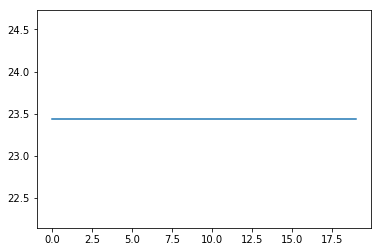

In [21]:
df.temperature.plot();